In [368]:
from typing import List
import copy

BoradState = np.ndarray

@dataclass
class BoardCoord:
    x: int
    y: int

@dataclass
class Move:
    piece: BoardCoord
    dx: int
    dy: int
    
intial_board = np.array([
            [0, 0, 1, 1, 1, 0, 0],
            [0, 0, 1, 1, 1, 0, 0],
            [1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 2, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1],
            [0, 0, 1, 1, 1, 0, 0],
            [0, 0, 1, 1, 1, 0, 0],
        ])

@dataclass
class pag_solitare():
    
    def __init__(self, board):
        self.board = board
        self.move_count = 0
        self.board_height, self.board_length = self.board.shape

    def make_move(self, move: Move):
        """
        make a move an update board status
        @param x,y: position marble to move
        @param dx, dy: \in {0,+1,-1}, defines the move to make
        """
        new_board_state = np.copy(self.board)
        
        x, y, dx, dy = move.piece.x, move.piece.y, move.dx, move.dy
        new_board_state[x, y] = 2
        new_board_state[x+dx, y+dy] = 2
        new_board_state[x+2*dx, y+2*dy] = 1
        return pag_solitare(new_board_state)
    
    def is_valid_move(self, move: Move) -> bool:
        """
        verify move is valid
        """
        x, y, dx, dy = move.piece.x, move.piece.y, move.dx, move.dy
        cond1, cond2, cond3 = False, False, False
        if (0<x+2*dx<self.board_length) & (0<y+2*dy<self.board_height):
            cond1 = (self.board[x,y] == 1)        
            cond2 = (self.board[x+dx,y+dy] == 1)
            cond3 = (self.board[x+2*dx,y+2*dy] == 2)
        
        return cond1 & cond2 & cond3
    
    def get_possible_moves(self) -> List[List[int]]:
        """
        returns a list of possible moves, each move
        is represented as [x,y, dx, dy]
        where:
            x,y \in {board}
            dx,dy \in {0,1,-1}
        """
        moves = []
        for x in range(self.board_length):
            for y in range(self.board_height):
                for dx, dy in zip([0,0,1,-1],[1,-1,0,0]):
                    move = Move(BoardCoord(x,y), dx, dy)
                    if self.is_valid_move(move): 
                        moves.append(move)
        return moves
    
    @property
    def get_state(self):
        return self.board
    
    def is_game_over(self) -> bool:
        """
        check if game solved
        """
#         return len(np.where(self.board == 1)[0])==1
        return np.sum(self.board==1)==1
    
def dfs_search(board: pag_solitare):
#     seen_states: Set[np.array] = set()
#     stack: List[tuple((pag_solitare, Move))] = [(board, 0)]
    seen_board_states = set()
    stack = [[(board, 0)]]
    
    counter = 0
    while stack:
        curr_game = stack.pop()
        last_board_state = curr_game[-1][0]
        state_str = "".join("".join(str(row.tobytes())) for row in last_board_state.board)
        if state_str not in seen_board_states:
            counter+=1
            if np.mod(counter,100000)==0:
                print(counter)

            
            if last_board_state.is_game_over():
                return curr_game

            seen_board_states.add(state_str)
            # apply all possible moves, and duplicate games
            for move in last_board_state.get_possible_moves():
                new_board = last_board_state.make_move(move)
                another_game = copy.copy(curr_game)
                another_game.append((new_board, move))
                stack.append(another_game)
#         else:
#             print("seen state")

    
    raise RuntimeError("leaking while loop?")
        
        
        

        

In [369]:
#final board test
final = np.zeros((9,9))
final[3,3] = 1
final_board = pag_solitare(final)
final_board.is_game_over()

True

In [370]:
board = pag_solitare(intial_board)
seen_board_states = []
stack = [[(board, 0)]]
curr_game = stack.pop()
last_board_state = curr_game[-1][0]
seen_board_states.append(last_board_state.board)
moves = last_board_state.get_possible_moves()
new_board = last_board_state.make_move(moves[1])
new_board.board

array([[0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 2, 2, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0]])

In [371]:
another_game = copy.copy(curr_game)
another_game.append((new_board, moves[0]))

In [372]:
np.sum(board.board==1)

32

In [373]:
win_game = dfs_search(board)

100000
200000


In [374]:
win_game

[(pag_solitare(), 0),
 (pag_solitare(), Move(piece=BoardCoord(x=5, y=3), dx=-1, dy=0)),
 (pag_solitare(), Move(piece=BoardCoord(x=4, y=5), dx=0, dy=-1)),
 (pag_solitare(), Move(piece=BoardCoord(x=6, y=4), dx=-1, dy=0)),
 (pag_solitare(), Move(piece=BoardCoord(x=6, y=2), dx=0, dy=1)),
 (pag_solitare(), Move(piece=BoardCoord(x=4, y=3), dx=0, dy=1)),
 (pag_solitare(), Move(piece=BoardCoord(x=4, y=6), dx=0, dy=-1)),
 (pag_solitare(), Move(piece=BoardCoord(x=4, y=2), dx=1, dy=0)),
 (pag_solitare(), Move(piece=BoardCoord(x=4, y=0), dx=0, dy=1)),
 (pag_solitare(), Move(piece=BoardCoord(x=3, y=4), dx=1, dy=0)),
 (pag_solitare(), Move(piece=BoardCoord(x=6, y=4), dx=-1, dy=0)),
 (pag_solitare(), Move(piece=BoardCoord(x=3, y=6), dx=0, dy=-1)),
 (pag_solitare(), Move(piece=BoardCoord(x=3, y=2), dx=1, dy=0)),
 (pag_solitare(), Move(piece=BoardCoord(x=6, y=2), dx=-1, dy=0)),
 (pag_solitare(), Move(piece=BoardCoord(x=1, y=2), dx=1, dy=0)),
 (pag_solitare(), Move(piece=BoardCoord(x=4, y=2), dx=-1, dy=

In [421]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation,ArtistAnimation

In [ ]:
Figure = plt.figure()
fig, ax = plt.subplots()

# creating a plot
ind = np.where(board.board==1)
# curr_state = plt.imshow(board.board)
# curr_state = plt.plot(ind[0], ind[1],'o')
curr_state, = ax.plot(ind[0], ind[1], 'ro')

plt.xlim(0,6)  
 
# putting limits on y since it is a
# cosine function
plt.ylim(0,6)    
 
plt.title("all rights reserved to ChefVonio")

def AnimationFunction(frame): 
#     curr_state.set_data(win_game[frame][0].board)
    ind = np.where(win_game[frame][0].board==1)
    curr_state.set_data(ind[0], ind[1])
    return curr_state, 
    
ani = FuncAnimation(Figure, AnimationFunction, frames=len(win_game), interval=100)
ani.save("C:\\Users\\User\\Downloads\\how_to_win_pag_solitaire1.mp4", writer='pillow', fps=1)

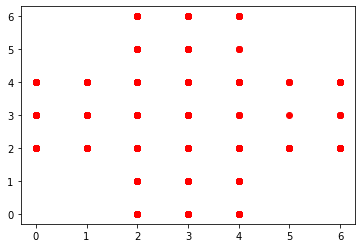

In [423]:
fig, ax = plt.subplots()
game_seq = []
ax.set_title('all rights ')
for game in win_game:
    ind = np.where(game[0].board==1)
    game_seq.append(ax.plot(ind[0], ind[1], 'ro'))
    
ani =  ArtistAnimation(fig=fig, artists=game_seq, interval=400)

In [424]:
ani.save("C:\\Users\\User\\Downloads\\how_to_win_pag_solitaire1.gif", writer='pillow', fps=1)

In [346]:
f in q

False